In [96]:
from bs4 import BeautifulSoup
from fuzzywuzzy import process
import requests
import matplotlib.pyplot as plt
from collections import OrderedDict

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

In [97]:
zack_url = "https://scholar.google.com/citations?user=X7FY3wUAAAAJ&hl=en&oi=ao"
hinton_url = "https://scholar.google.com/citations?user=JicYPdAAAAAJ&hl=en&oi=ao"

In [98]:
driver = Chrome()

In [99]:
button_xpath = "/html/body/div/div[13]/div[2]/div/div[4]/form/div[2]/div/button"

In [100]:
driver.get(hinton_url)
count = 0

while True:  
    try:
        button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, button_xpath)))
        button.click()
        count += 1
        print(f"click number: {count}")
        
    except TimeoutException:
        print('not clickable')
        break

html = driver.page_source

click number: 1
click number: 2
click number: 3
click number: 4
click number: 5
click number: 6
click number: 7
click number: 8
not clickable


In [89]:
page = BeautifulSoup(html)

In [90]:
page_title = page.find('title').string
author_name = page_title.split(' - ')[0]
author_name

'Geoffrey Hinton'

In [91]:
# get authors of each paper
authors_journals = []
for auth in page.find_all("div", attrs={"class": "gs_gray"}):
    authors_journals.append(auth.text)
    
# remove extra gs_gray classes found (the journal names)
authors = [text for i,text in enumerate(authors_journals) if i%2==0]

In [92]:
authors[:3]

['DE Rumelhart, GE Hinton, RJ Williams',
 'A Krizhevsky, I Sutskever, GE Hinton',
 'DE Rumelhart, GE Hinton, RJ Williams']

In [93]:
# get author position counts
author_positions = {}

author_lists = [names.split(', ') for names in authors]

for names in author_lists:
    match = process.extractOne(author_name, names)[0]
    
    for i, author in enumerate(names):
        
        if author == match:
            if str(i+1) in author_positions:
                author_positions[str(i+1)] += 1
            else:
                author_positions[str(i+1)] = 1
            break
            
author_positions 

{'2': 267, '3': 132, '1': 233, '4': 44, '6': 11, '5': 22, '7': 1}

In [94]:
author_positions = OrderedDict(sorted(author_positions.items()))

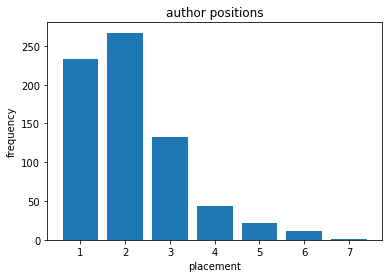

In [95]:
plt.bar(list(author_positions.keys()), list(author_positions.values()))
plt.title("author positions")
plt.xlabel("placement")
plt.ylabel("frequency");

In [ ]:
driver.close()